<a href="https://colab.research.google.com/github/danielagerena/MineriaDeDatos_ProyectoFinal_Dengue/blob/main/Proyecto_Final_Modelos_Predictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación final de dengue

1. Preparación de Datos
2. División de los datos 70-30
3. Balanceo con el 70% de los datos
4. Hacer transformaciones
5. Aprendizaje del Modelo: Tree, Knn, NN, SVM, Bagging, XGBoosting, Stacking
6. Evaluación del Modelo con 30% sin balanceo: Matriz de confusion, F1-score, Accuracy, Recall, ROC
7. Elegir los 3 mejores modelos con ANOVA
8. Hiperparametrízación y optimización bayesiana
9. Elegir el mejor modelo y guardarlo

##1. Importar librerías básicas

In [ ]:
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

##2. Cargamos los datos

In [ ]:
df = pd.read_excel('datos_dengue_preparados.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159 entries, 0 to 10158
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10159 non-null  int64 
 1   pac_hos_    10159 non-null  int64 
 2   desplazami  10159 non-null  int64 
 3   dolrretroo  10159 non-null  int64 
 4   artralgia   10159 non-null  int64 
 5   erupcionr   10159 non-null  int64 
 6   dolor_abdo  10159 non-null  int64 
 7   vomito      10159 non-null  int64 
 8   diarrea     10159 non-null  int64 
 9   caida_plaq  10159 non-null  int64 
 10  extravasac  10159 non-null  int64 
 11  hemorr_hem  10159 non-null  int64 
 12  choque      10159 non-null  int64 
 13  daño_organ  10159 non-null  int64 
 14  clasfinal   10159 non-null  object
dtypes: int64(14), object(1)
memory usage: 1.2+ MB


In [ ]:
#Eliminar autonumérico
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['pac_hos_', 'desplazami', 'dolrretroo', 'artralgia', 'erupcionr',
       'dolor_abdo', 'vomito', 'diarrea', 'caida_plaq', 'extravasac',
       'hemorr_hem', 'choque', 'daño_organ', 'clasfinal'],
      dtype='object')

In [ ]:
#Función para corrección del tipo de datos object a categorías
def convertir_objeto_a_categoria(df):
    """
    Convierte todas las columnas de tipo 'object' a 'category' en un DataFrame.

    Parámetros:
        df (pd.DataFrame): El DataFrame a procesar.

    Retorna:
        pd.DataFrame: El DataFrame con las columnas tipo objeto convertidas a categoría.
    """
    columnas_convertidas = []
    for col in df.columns:
        df[col] = df[col].astype('category') #.select_dtypes(include='object')
        columnas_convertidas.append(col)
    print(f"Columnas convertidas a 'category': {columnas_convertidas}")
    return df

In [ ]:
df = convertir_objeto_a_categoria(df) #Todas las variables son categóricas

Columnas convertidas a 'category': ['pac_hos_', 'desplazami', 'dolrretroo', 'artralgia', 'erupcionr', 'dolor_abdo', 'vomito', 'diarrea', 'caida_plaq', 'extravasac', 'hemorr_hem', 'choque', 'daño_organ', 'clasfinal']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159 entries, 0 to 10158
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pac_hos_    10159 non-null  category
 1   desplazami  10159 non-null  category
 2   dolrretroo  10159 non-null  category
 3   artralgia   10159 non-null  category
 4   erupcionr   10159 non-null  category
 5   dolor_abdo  10159 non-null  category
 6   vomito      10159 non-null  category
 7   diarrea     10159 non-null  category
 8   caida_plaq  10159 non-null  category
 9   extravasac  10159 non-null  category
 10  hemorr_hem  10159 non-null  category
 11  choque      10159 non-null  category
 12  daño_organ  10159 non-null  category
 13  clasfinal   10159 non-null  category
dtypes: category(14)
memory usage: 140.7 KB


##3. División 70-30

###3.0. Codificación de variable objetivo antes de dividir

In [ ]:
#LabelEncoder para la variable objetivo
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['clasfinal'] =labelencoder.fit_transform(df['clasfinal'])

df

,pac_hos_,desplazami,dolrretroo,artralgia,erupcionr,dolor_abdo,vomito,diarrea,caida_plaq,extravasac,hemorr_hem,choque,daño_organ,clasfinal
0,1,2,2,2,2,1,1,1,2,2,2,2,2,0
1,2,2,2,1,1,2,2,2,2,2,2,2,2,2
2,2,2,1,2,1,2,2,2,2,2,2,2,2,2
3,2,2,1,1,2,2,2,2,2,2,2,2,2,2
4,2,2,1,2,1,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10154,2,2,2,1,1,2,2,2,2,2,2,2,2,2
10155,2,2,2,1,2,2,2,2,2,2,2,2,2,2
10156,2,2,2,1,2,2,2,2,2,2,2,2,2,2
10157,1,2,1,2,1,2,2,2,1,2,2,2,2,0


<Axes: xlabel='clasfinal'>

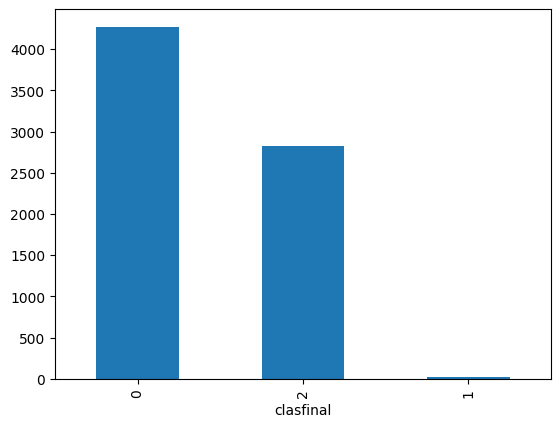

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = df.drop("clasfinal", axis = 1) # Variables predictoras
Y = df['clasfinal'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%
#NO cambiar el orden de las x_train...
#X_train, Y_train se hace balanceo, CV, y testeo con x_test

#Vables pred, Vable obj, test_size porcentaje, stratified en true cuando el CLASIFICACIÓN

In [ ]:
Y_train.value_counts()

,count
clasfinal,
0,4271
2,2822
1,18


<Axes: xlabel='clasfinal'>

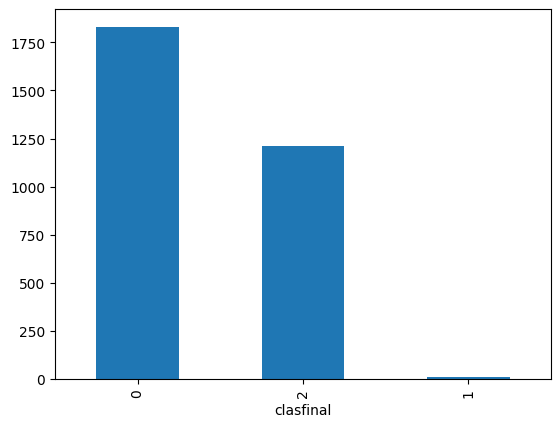

In [ ]:
#Graficar y_test
Y_test.value_counts().plot(kind='bar')

In [ ]:
Y_test.value_counts()

,count
clasfinal,
0,1831
2,1209
1,8


In [ ]:
X = df.drop("clasfinal", axis = 1)
Y = df['clasfinal']

##4. Balanceo con el 70% de los datos

In [ ]:
from imblearn.over_sampling import SMOTEN
import numpy as np

# Calcular el 50% de la clase mayoritaria (0)
n_majority = sum(Y_train == 0)
target_minority = int(0.5 * n_majority)

# Estrategia de muestreo: solo aumentar la clase 1 (DENGUE GRAVE)
sampling_strategy = {1: target_minority}

# Aplicar SMOTEN solo al conjunto de entrenamiento
smote = SMOTEN(
    sampling_strategy=sampling_strategy,
    k_neighbors=min(7, sum(Y_train == 1) - 1),  # Ajustar según muestras disponibles
    random_state=42
)

X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
print("Distribución después de balanceo:")
print(pd.Series(Y_train_smote).value_counts())

# Resultado esperado (ejemplo):
# 0    4271  # Clase mayoritaria (original)
# 2    2822  # Clase intermedia (original)
# 1    2135  # Clase minoritaria (50% de 4271)

Distribución después de balanceo:
clasfinal
0    4271
2    2822
1    2135
Name: count, dtype: int64


<Axes: xlabel='clasfinal'>

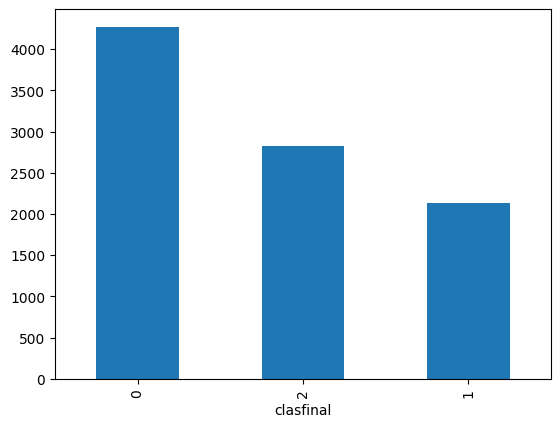

In [ ]:
Y_train_smote.value_counts().plot(kind='bar')

###4.0. Validación cruzada con el 70% de los datos

In [ ]:
#Crear dummies POST-balanceo (solo en train)
def crear_dummies_balanceadas(df, exclude_cols=[]):
    """Versión optimizada para datos balanceados"""
    df_dummies = df.copy()
    for col in df.select_dtypes(include='category').columns:
        if col not in exclude_cols:
            dummies = pd.get_dummies(
                df_dummies[col],
                prefix=col,
                drop_first=(df_dummies[col].nunique() == 2),
                dtype=int
            )
            df_dummies = pd.concat([df_dummies.drop(columns=[col]), dummies], axis=1)
    return df_dummies

In [ ]:
X_train_smote = crear_dummies_balanceadas(X_train_smote)
X_test = crear_dummies_balanceadas(X_test) #Test sin SMOTE

In [ ]:
#Validación Cruzada para clasificación con el 70% de los datos
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    'f1_weighted': 'f1_weighted',
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'roc_auc_ovo': 'roc_auc_ovo'
}

##4.1. Árbol de decisión
No se hacen transformaciones para el árbol


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

#Configurar el modelo
model_tree = DecisionTreeClassifier(
    criterion='gini',
    min_samples_leaf=200,       # Controla el sobreajuste en hojas
    max_depth=None,             # Permite que el árbol crezca completamente
    random_state=42             # Para reproducibilidad
)

# 3. Ejecutar validación cruzada (usando los datos YA BALANCEADOS)
scores = cross_validate(
    estimator=model_tree,
    X=X_train_smote,              # Datos de entrenamiento balanceados
    y=Y_train_smote,              # Variable objetivo balanceada
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=False       # No necesitamos los estimadores para este análisis
)

In [ ]:
# 4. Convertir resultados a DataFrame y mostrar métricas clave
scores_df = pd.DataFrame(scores)
print("\nResultados de Validación Cruzada (Promedio):")
print(scores_df.mean()[['test_f1_weighted', 'test_accuracy', 'test_recall_macro']])



Resultados de Validación Cruzada (Promedio):
test_f1_weighted     0.917337
test_accuracy        0.917857
test_recall_macro    0.926788
dtype: float64


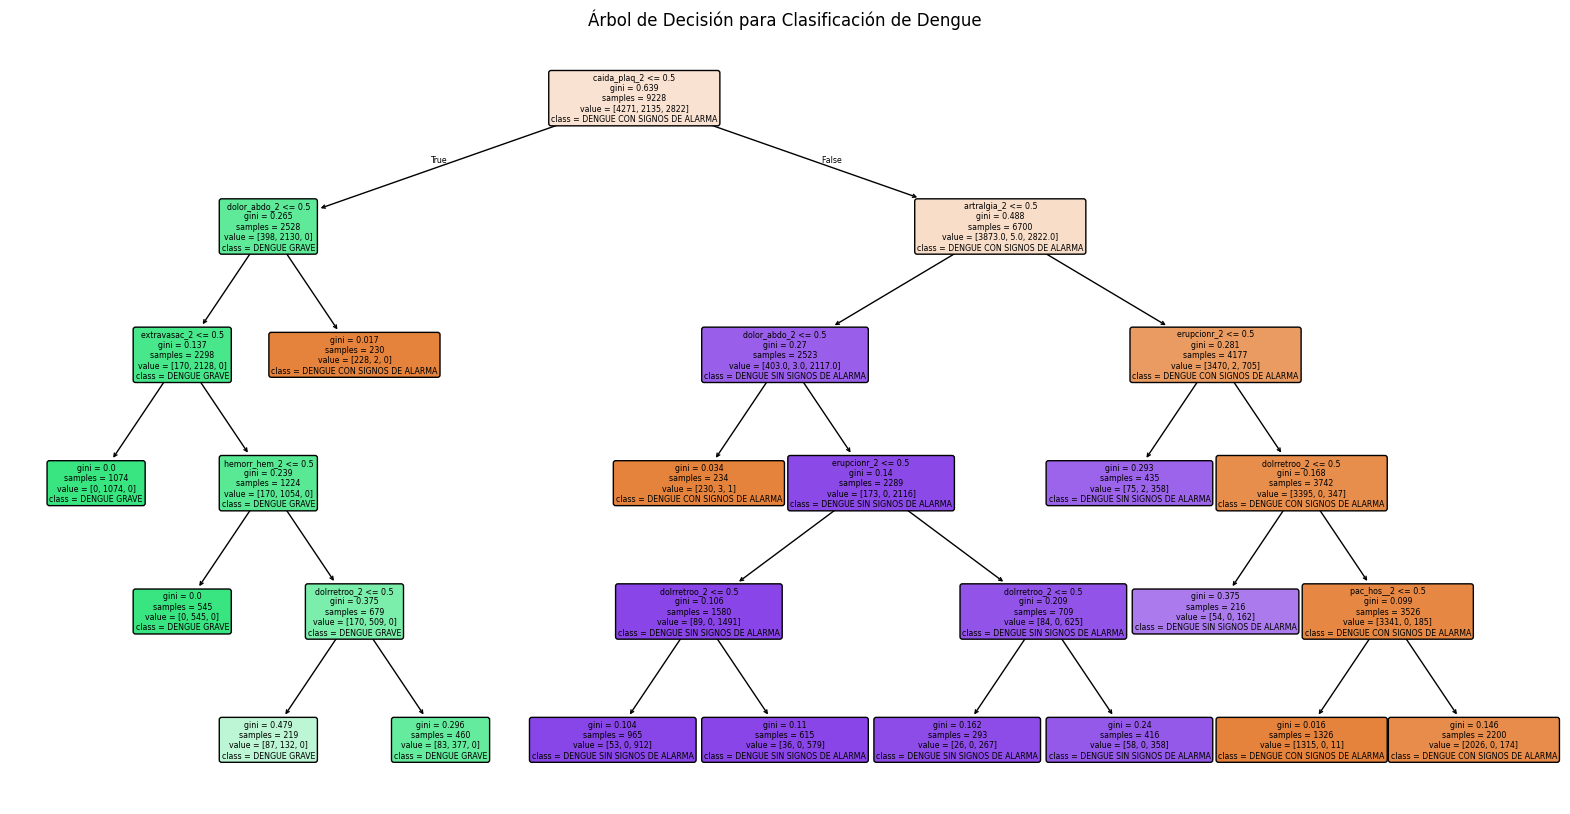

In [ ]:
#Visualización del árbol (opcional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    model_tree.fit(X_train_smote, Y_train_smote),
    feature_names=X_train_smote.columns,
    class_names=labelencoder.classes_,
    filled=True,
    rounded=True
)
plt.title("Árbol de Decisión para Clasificación de Dengue")
plt.show()

In [ ]:
# Promedios
scores_df.mean()

,0
fit_time,0.007150
score_time,0.015600
test_f1_weighted,0.917337
train_f1_weighted,0.918938
test_accuracy,0.917857
train_accuracy,0.919424
test_precision_macro,0.919078
train_precision_macro,0.920222
test_recall_macro,0.926788
train_recall_macro,0.928184


In [ ]:
#Se almacena en el df la medida a comparar CON TEST
comparacion_CV['Tree']=scores_df['test_f1_weighted']
comparacion_CV['Tree_train']=scores_df['train_f1_weighted']
print(comparacion_CV)

       Tree  Tree_train
0  0.909297    0.916398
1  0.932526    0.913820
2  0.898697    0.917604
3  0.931203    0.924474
4  0.913863    0.915897
5  0.914970    0.915773
6  0.919441    0.928518
7  0.933477    0.924223
8  0.912679    0.916030
9  0.907211    0.916645


In [ ]:
#comparar el f1 train y test
#Tree Modelo final para sacarlo ANTES DE NORMALIZAR, los otros si van normalizados
model_tree.fit(X_train_smote, Y_train_smote) #100%

DecisionTreeClassifier(min_samples_leaf=200, random_state=42)

##5. Hacer transformaciones con el 70% de los datos (Normalización)

###5.2. Normalizar

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)

#No tenemos variables numéricas, por lo que podemos omitir este paso

##6. Aprendizaje de modelos aprendizaje supervisado (Knn, NN, SVM)

###6.3. Knn

In [ ]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
#Configurar el modelo KNN con parámetros adecuados para datos categóricos
model_knn = KNeighborsClassifier(
    n_neighbors=5,               # Valor que evita overfitting
    metric='hamming',            # Métrica ideal para datos categóricos (mejor que euclidean)
    weights='distance'           # Da más peso a vecinos más cercanos              # Usa todos los núcleos del CPU
)

scores_knn = cross_validate(model_knn, X_train_smote, Y_train_smote, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores_knn_df = pd.DataFrame(scores_knn) #Se almacenan los resultados en un dataframe

In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_f1_weighted']
comparacion_CV['Knn_train']=scores['train_f1_weighted']
print(comparacion_CV)

       Tree  Tree_train       Knn  Knn_train
0  0.909297    0.916398  0.909297   0.916398
1  0.932526    0.913820  0.932526   0.913820
2  0.898697    0.917604  0.898697   0.917604
3  0.931203    0.924474  0.931203   0.924474
4  0.913863    0.915897  0.913863   0.915897
5  0.914970    0.915773  0.914970   0.915773
6  0.919441    0.928518  0.919441   0.928518
7  0.933477    0.924223  0.933477   0.924223
8  0.912679    0.916030  0.912679   0.916030
9  0.907211    0.916645  0.907211   0.916645


<Axes: >

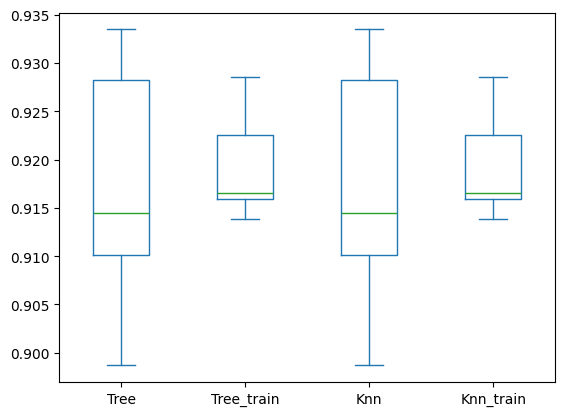

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

###6.4. Red Neuronal

In [ ]:
#Red neuronal
from sklearn.neural_network import MLPClassifier

model_rn = MLPClassifier(
    hidden_layer_sizes=(16),
    activation='relu',                 # Función de activación recomendada
    solver='adam',                     # Optimizador para datos categóricos
    learning_rate_init=0.01,           # Tasa de aprendizaje
    early_stopping=True,               # Detiene el entrenamiento si no mejora
    max_iter=500,
    random_state=42,                   # Reproducibilidad
    verbose=False
)

scores = cross_validate(model_rn, X_train_smote, Y_train_smote, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)

#Validación cruzada con datos balanceados
scores_rn = cross_validate(
    estimator=model_rn,
    X=X_train_smote,                    # Usar datos balanceados (SMOTEN)
    y=Y_train_smote,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)
scores_rn_df=pd.DataFrame(scores_rn) #Se almacenan los resultados en un dataframe

In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Rn']=scores['test_f1_weighted']
comparacion_CV['Rn_train']=scores['train_f1_weighted']
print(comparacion_CV) #TABLA CLAVE PARA HACER COMPARACIONES Y SABER CUÁL ES EL MEJOR MODELO

       Tree  Tree_train       Knn  Knn_train        Rn  Rn_train
0  0.909297    0.916398  0.909297   0.916398  0.967271  0.977049
1  0.932526    0.913820  0.932526   0.913820  0.982643  0.974613
2  0.898697    0.917604  0.898697   0.917604  0.960890  0.977399
3  0.931203    0.924474  0.931203   0.924474  0.980405  0.974980
4  0.913863    0.915897  0.913863   0.915897  0.971744  0.972452
5  0.914970    0.915773  0.914970   0.915773  0.981550  0.972329
6  0.919441    0.928518  0.919441   0.928518  0.976092  0.975235
7  0.933477    0.924223  0.933477   0.924223  0.981540  0.975465
8  0.912679    0.916030  0.912679   0.916030  0.974947  0.975714
9  0.907211    0.916645  0.907211   0.916645  0.967322  0.974397


<Axes: >

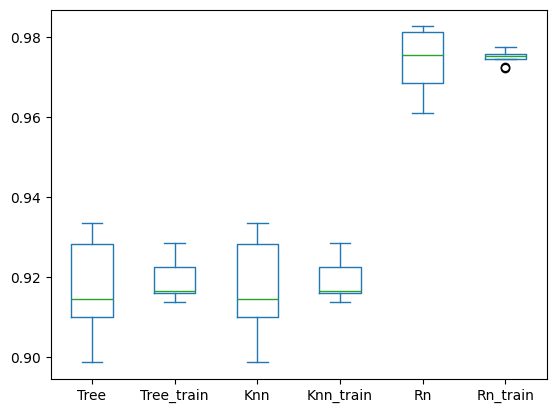

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

###6.5. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Definir el modelo SVM
model_SVM = SVC(kernel='linear',
               C=0.5,           # Regularización intermedia (evita sobreajuste)
               probability=True,        # Habilita predict_proba para métricas AUC
               random_state=42, # Reproducibilidad
               decision_function_shape='ovr'  # Estrategia multiclase
               )

scoring = {
    'f1_weighted': 'f1_weighted',      # Prioriza clases minoritarias
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',    # Importante para casos graves
    'roc_auc_ovo': 'roc_auc_ovo'       # Evalúa capacidad de ranking
}

# Validación cruzada
scores_svm = cross_validate(model_SVM, X_train_smote, Y_train_smote, cv=cv, scoring=scoring,
                            return_train_score=True, return_estimator=False)

# Resultados en DataFrame
scores_svm_df = pd.DataFrame(scores_svm)

In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['SVM']=scores_svm['test_f1_weighted']
comparacion_CV['SVM_train']=scores_svm['train_f1_weighted']
print(comparacion_CV) #TABLA CLAVE PARA HACER COMPARACIONES Y SABER CUÁL ES EL MEJOR MODELO

       Tree  Tree_train       Knn  Knn_train        Rn  Rn_train       SVM  \
0  0.909297    0.916398  0.909297   0.916398  0.967271  0.977049  0.962961   
1  0.932526    0.913820  0.932526   0.913820  0.982643  0.974613  0.982652   
2  0.898697    0.917604  0.898697   0.917604  0.960890  0.977399  0.958726   
3  0.931203    0.924474  0.931203   0.924474  0.980405  0.974980  0.976071   
4  0.913863    0.915897  0.913863   0.915897  0.971744  0.972452  0.971759   
5  0.914970    0.915773  0.914970   0.915773  0.981550  0.972329  0.980464   
6  0.919441    0.928518  0.919441   0.928518  0.976092  0.975235  0.976102   
7  0.933477    0.924223  0.933477   0.924223  0.981540  0.975465  0.979391   
8  0.912679    0.916030  0.912679   0.916030  0.974947  0.975714  0.974947   
9  0.907211    0.916645  0.907211   0.916645  0.967322  0.974397  0.968407   

   SVM_train  
0   0.974281  
1   0.973062  
2   0.974759  
3   0.972829  
4   0.973307  
5   0.972338  
6   0.972824  
7   0.972457  
8   0.

<Axes: >

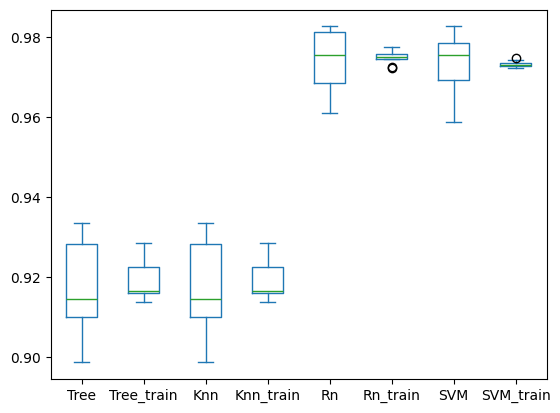

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

##6. Aprendizaje de modelos ensambles (Bagging, XGBoost, Stacking)

###6.6. Bagging

In [ ]:
#Bagging: Knn
from sklearn.ensemble import BaggingClassifier
base_knn = KNeighborsClassifier(
    n_neighbors=3,               # Valor más robusto que 1 (evita overfitting)
    metric='hamming',            # Ideal para datos categóricos (dummies)
    weights='distance'           # Mayor peso a vecinos más cercanos
)

#Configuración Bagging
model_bag = BaggingClassifier(
    estimator=base_knn,
    n_estimators=100,            # Número suficiente de estimadores (como recomendaste)
    max_samples=0.6,             # 60% de muestras por estimador
    random_state=42              # Reproducibilidad
)

scoring = {
    'f1_weighted': 'f1_weighted',
    'accuracy': 'accuracy',
    'recall_macro': 'recall_macro',
    'roc_auc_ovo': 'roc_auc_ovo'
}

scores_bag = cross_validate(
    model_bag,
    X=X_train_smote,              # Datos de entrenamiento balanceados
    y=Y_train_smote,
    cv=cv,                       # Validación cruzada
    scoring=scoring,
    return_train_score=True
)
# Resultados en DataFrame
scores_bag_df = pd.DataFrame(scores_bag)

In [ ]:
comparacion_CV['Bagging_KNN'] = scores_bag_df['test_f1_weighted']  # Métrica principal
comparacion_CV['Bagging_KNN_train'] = scores_bag_df['train_f1_weighted']  # Métrica principal
print(comparacion_CV)

       Tree  Tree_train       Knn  Knn_train        Rn  Rn_train       SVM  \
0  0.909297    0.916398  0.909297   0.916398  0.967271  0.977049  0.962961   
1  0.932526    0.913820  0.932526   0.913820  0.982643  0.974613  0.982652   
2  0.898697    0.917604  0.898697   0.917604  0.960890  0.977399  0.958726   
3  0.931203    0.924474  0.931203   0.924474  0.980405  0.974980  0.976071   
4  0.913863    0.915897  0.913863   0.915897  0.971744  0.972452  0.971759   
5  0.914970    0.915773  0.914970   0.915773  0.981550  0.972329  0.980464   
6  0.919441    0.928518  0.919441   0.928518  0.976092  0.975235  0.976102   
7  0.933477    0.924223  0.933477   0.924223  0.981540  0.975465  0.979391   
8  0.912679    0.916030  0.912679   0.916030  0.974947  0.975714  0.974947   
9  0.907211    0.916645  0.907211   0.916645  0.967322  0.974397  0.968407   

   SVM_train  Bagging_KNN  Bagging_KNN_train  
0   0.974281     0.966217           0.977165  
1   0.973062     0.982652           0.975219  


###6.7. XGboost

In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(
    max_depth=5,                  # Reduce profundidad para evitar overfitting
    learning_rate=0.05,           # Tasa de aprendizaje más conservadora
    n_estimators=100,             # Mayor número de árboles (compensa learning_rate bajo)
    subsample=0.8,                # Muestreo aleatorio de instancias
    colsample_bytree=0.8,         # Muestreo aleatorio de características
    gamma=0.1,                    # Regularización para hojas
    reg_alpha=0.5,                # Regularización L1
    reg_lambda=1.0,               # Regularización L2
    objective='multi:softmax',    # Para clasificación multiclase
    num_class=3,                  # Número de clases (DENGUE GRAVE, CON SIGNOS, SIN SIGNOS)
    tree_method='hist',           # Optimización para velocidad
    enable_categorical=False,     # False porque ya usas dummies
    use_label_encoder=False,      # Evita warning (usamos label encoding manual)
    random_state=42
)

scoring = {
    'f1_weighted': 'f1_weighted',
    'accuracy': 'accuracy',
    'recall_macro': 'recall_macro',
    'roc_auc_ovo': 'roc_auc_ovo'
}

scores_xgb = cross_validate(
    model_xgb,
    X=X_train_smote,              # Datos de entrenamiento balanceados
    y=Y_train_smote,
    cv = cv,
    scoring=scoring,
    return_train_score=True
)
# Resultados en DataFrame
scores_xgb_df = pd.DataFrame(scores_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
comparacion_CV['XGB'] = scores_xgb_df['test_f1_weighted']  # Métrica principal
comparacion_CV['XGB_train'] = scores_xgb_df['train_f1_weighted']  # Métrica principal
print(comparacion_CV)

       Tree  Tree_train       Knn  Knn_train        Rn  Rn_train       SVM  \
0  0.909297    0.916398  0.909297   0.916398  0.967271  0.977049  0.962961   
1  0.932526    0.913820  0.932526   0.913820  0.982643  0.974613  0.982652   
2  0.898697    0.917604  0.898697   0.917604  0.960890  0.977399  0.958726   
3  0.931203    0.924474  0.931203   0.924474  0.980405  0.974980  0.976071   
4  0.913863    0.915897  0.913863   0.915897  0.971744  0.972452  0.971759   
5  0.914970    0.915773  0.914970   0.915773  0.981550  0.972329  0.980464   
6  0.919441    0.928518  0.919441   0.928518  0.976092  0.975235  0.976102   
7  0.933477    0.924223  0.933477   0.924223  0.981540  0.975465  0.979391   
8  0.912679    0.916030  0.912679   0.916030  0.974947  0.975714  0.974947   
9  0.907211    0.916645  0.907211   0.916645  0.967322  0.974397  0.968407   

   SVM_train  Bagging_KNN  Bagging_KNN_train       XGB  XGB_train  
0   0.974281     0.966217           0.977165  0.967296   0.976076  
1   0

<Axes: >

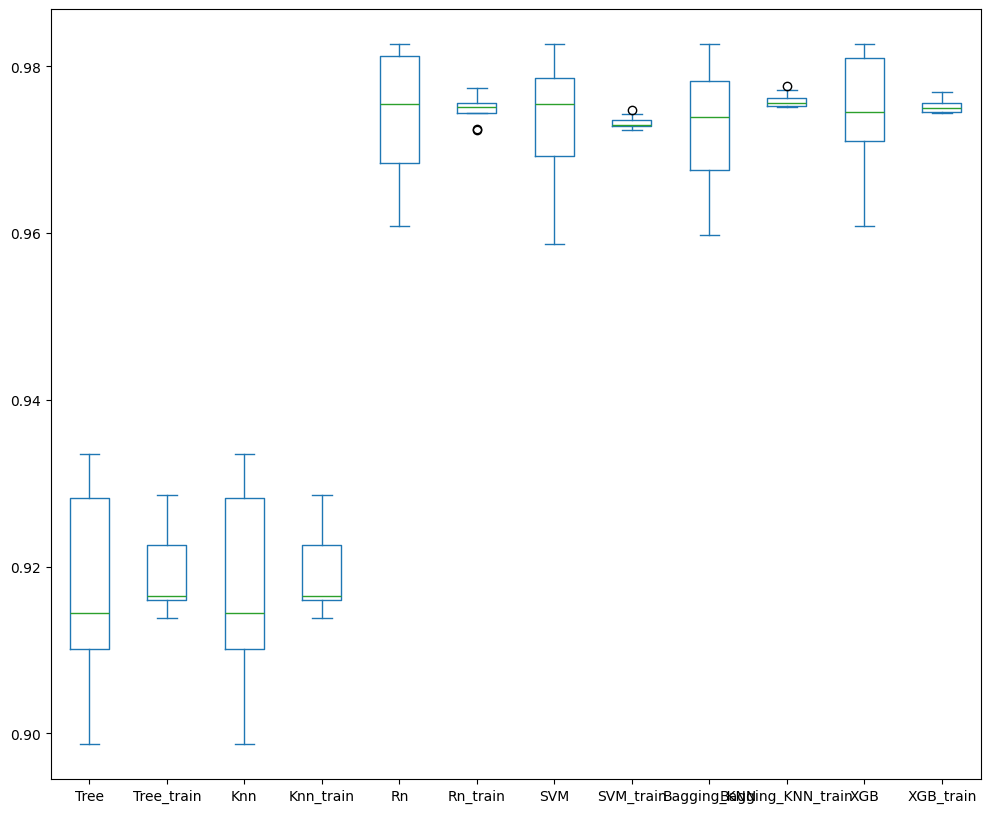

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box', figsize=(12,10))

###6.8. Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

clasificadores = [
    ('tree', model_tree),   # Árbol de decisión (configurado con class_weight='balanced')
    ('knn', model_knn), # KNN con metric='hamming'
    ('rn', model_rn)    # Red neuronal con early_stopping=True
]

#Método ensamblador
metodo_ensamblador = LogisticRegression(
    penalty='l2',           # Regularización L2
    C=0.5,                  # Fuerza de regularización
    solver='lbfgs',         # Bueno para multiclase
    max_iter=1000,          # Suficientes iteraciones
    class_weight='balanced', # Compensa desbalanceo
    random_state=42
)

#Configuración stacking
model_stack = StackingClassifier(
    estimators=clasificadores,
    final_estimator=metodo_ensamblador,
    stack_method='predict_proba',  # Usa probabilidades para mejor ensamblaje
    passthrough=True               # Incluye características originales
)

scoring = {
    'f1_weighted': 'f1_weighted',
    'accuracy': 'accuracy',
    'recall_macro': 'recall_macro',
    'roc_auc_ovo': 'roc_auc_ovo'
}

#Valdación cruzada
scores_stack = cross_validate(
    model_stack,
    X=X_train_smote,              # Datos de entrenamiento balanceados
    y=Y_train_smote,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

scores_stack_df = pd.DataFrame(scores_stack)

In [ ]:
comparacion_CV['Stacking'] = scores_stack_df['test_f1_weighted']
comparacion_CV['Stacking_train'] = scores_stack_df['train_f1_weighted']
print(comparacion_CV)

       Tree  Tree_train       Knn  Knn_train        Rn  Rn_train       SVM  \
0  0.909297    0.916398  0.909297   0.916398  0.967271  0.977049  0.962961   
1  0.932526    0.913820  0.932526   0.913820  0.982643  0.974613  0.982652   
2  0.898697    0.917604  0.898697   0.917604  0.960890  0.977399  0.958726   
3  0.931203    0.924474  0.931203   0.924474  0.980405  0.974980  0.976071   
4  0.913863    0.915897  0.913863   0.915897  0.971744  0.972452  0.971759   
5  0.914970    0.915773  0.914970   0.915773  0.981550  0.972329  0.980464   
6  0.919441    0.928518  0.919441   0.928518  0.976092  0.975235  0.976102   
7  0.933477    0.924223  0.933477   0.924223  0.981540  0.975465  0.979391   
8  0.912679    0.916030  0.912679   0.916030  0.974947  0.975714  0.974947   
9  0.907211    0.916645  0.907211   0.916645  0.967322  0.974397  0.968407   

   SVM_train  Bagging_KNN  Bagging_KNN_train       XGB  XGB_train  Stacking  \
0   0.974281     0.966217           0.977165  0.967296   0.976

<Axes: >

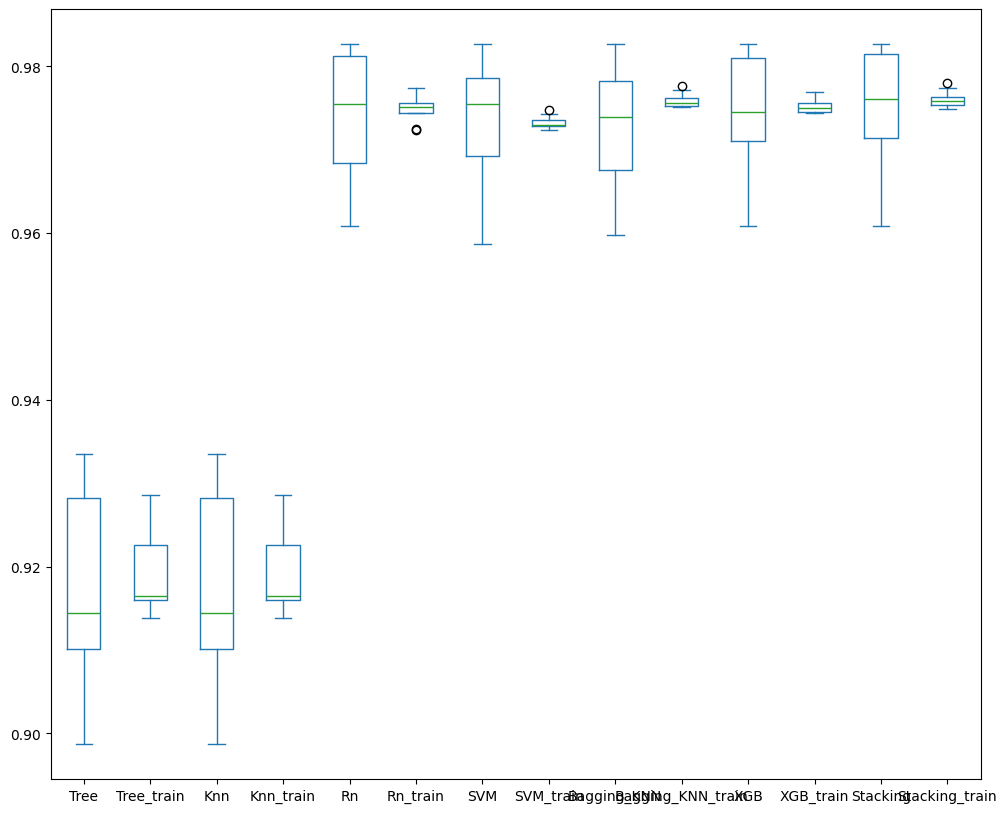

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box', figsize=(12,10))

##7. Evaluación en el Conjunto de Test (30% no balanceado)

In [ ]:
#Calculamos métricas en los datos reales (no balanceados)
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score

X_test = X_test.reindex(columns=X_train_smote.columns, fill_value=0)

f1_scores = {
    'Tree': scores_df['test_f1_weighted'],
    'Knn': scores_knn_df['test_f1_weighted'],
    'Rn': scores_rn_df['test_f1_weighted'],
    'SVM': scores_svm_df['test_f1_weighted'],
    'Bagging_KNN': scores_bag_df['test_f1_weighted'],
    'XGB': scores_xgb_df['test_f1_weighted'],
    'Stacking': scores_stack_df['test_f1_weighted']
}

#Diccionario de modelos
modelos = {
    'Tree': model_tree,
    'Knn': model_knn,
    'Rn': model_rn,
    'SVM': model_SVM,
    'Bagging_KNN': model_bag,
    'XGB': model_xgb,
    'Stacking': model_stack
}

# Fit de modelo con los datos balanceados antes de predecir con el test set
for nombre, modelo in modelos.items():
    print(f"Fitting {nombre}...") #Ver progreso
    # Asegurarse de que el modelo ya hizo fit antes de hacer predicciones
    # Usamos los datos balanceados de entrenamiento (X_train_smote, Y_train_smote)
    modelo.fit(X_train_smote, Y_train_smote)
    print(f"Fitting {nombre} completado.")

#Dataframe parta almacenar los resultados
resultados_lista = []

Fitting Tree...
Fitting Tree completado.
Fitting Knn...
Fitting Knn completado.
Fitting Rn...
Fitting Rn completado.
Fitting SVM...
Fitting SVM completado.
Fitting Bagging_KNN...
Fitting Bagging_KNN completado.
Fitting XGB...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting XGB completado.
Fitting Stacking...
Fitting Stacking completado.


In [ ]:
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    resultados_lista.append({
        'Modelo': nombre,
        'F1_weighted': f1_score(Y_test, y_pred, average='weighted'),
        'Accuracy': accuracy_score(Y_test, y_pred),
        'Recall_macro': recall_score(Y_test, y_pred, average='macro'),
        'ROC_AUC_OVO': roc_auc_score(Y_test, modelo.predict_proba(X_test), multi_class='ovo')
    })

In [ ]:
# Convertir a DataFrame
resultados_test = pd.DataFrame(resultados_lista)

# Ordenar por F1_weighted (métrica principal)
resultados_test = resultados_test.sort_values('F1_weighted', ascending=False)
print(resultados_test)

        Modelo  F1_weighted  Accuracy  Recall_macro  ROC_AUC_OVO
2           Rn     0.970715  0.971129      0.728890     0.815516
6     Stacking     0.970715  0.971129      0.728890     0.906867
5          XGB     0.970711  0.971129      0.728797     0.857527
3          SVM     0.968999  0.968504      0.768919     0.897675
4  Bagging_KNN     0.968681  0.969160      0.686407     0.806816
1          Knn     0.968550  0.969160      0.686313     0.827642
0         Tree     0.928144  0.919291      0.741049     0.883022


##8. ANOVA + Tuckey para analizar diferencia estadística

Resultado ANOVA: p-valor = 0.0000

Diferencias globales detectadas. Procediendo con Tukey HSD...
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Bagging_KNN      Knn   0.0002    1.0  -0.011  0.0115  False
Bagging_KNN       Rn   0.0013 0.9998   -0.01  0.0126  False
Bagging_KNN      SVM      0.0    1.0 -0.0113  0.0113  False
Bagging_KNN Stacking   0.0021 0.9978 -0.0092  0.0133  False
Bagging_KNN     Tree  -0.0558    0.0 -0.0671 -0.0445   True
Bagging_KNN      XGB   0.0015 0.9996 -0.0098  0.0128  False
        Knn       Rn   0.0011 0.9999 -0.0102  0.0123  False
        Knn      SVM  -0.0002    1.0 -0.0115   0.011  False
        Knn Stacking   0.0018 0.9989 -0.0094  0.0131  False
        Knn     Tree   -0.056    0.0 -0.0673 -0.0448   True
        Knn      XGB   0.0013 0.9999   -0.01  0.0126  False
         Rn      SVM  -0.0013 0.9998 -0.0126    0.01  False
   

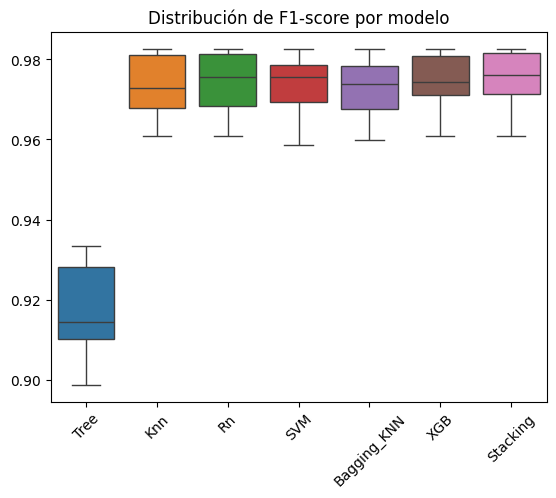

In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns


# 1. ANOVA: ¿Existen diferencias significativas entre al menos dos modelos?
f_stat, p_value = f_oneway(*f1_scores.values())
print(f"Resultado ANOVA: p-valor = {p_value:.4f}")

# 2. Solo si ANOVA es significativa (p < 0.05), aplica Tukey HSD
if p_value < 0.05:
    print("\nDiferencias globales detectadas. Procediendo con Tukey HSD...")
    # Preparar datos para Tukey (ya lo tienes)
    datos_tukey_full = pd.DataFrame({
        'f1': np.concatenate([scores for scores in f1_scores.values()]),
        'modelo': np.concatenate([[model] * len(scores) for model, scores in f1_scores.items()])
    })

    tukey_full = pairwise_tukeyhsd(datos_tukey_full['f1'], datos_tukey_full['modelo'], alpha=0.05)
    print(tukey_full)

    # Visualización (opcional)
    sns.boxplot(data=pd.DataFrame(f1_scores))
    plt.title("Distribución de F1-score por modelo")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nNo hay diferencias significativas entre los modelos (p ≥ 0.05).")

##9. Modelos seleccionados
los 3 mejores modelos son RN, SVM y Knn porque no tienen diferencia estadística significativa con los demás y tienen menor complejidad computacional que los modelos de ensambles

##10. Hiperparametrización
Se toman los datos divididos en 70-30 con el balanceo con SMOTE en el 70% de los datos

###10.1. Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Modelo base
modelKnn = KNeighborsClassifier()

# Espacio de búsqueda de hiperparámetros
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 13, 27],
    'metric': ['euclidean', 'minkowski'],
    'weights': ['uniform', 'distance']  # Ponderar por distancia
}

# Búsqueda en grid
grid_knn = GridSearchCV(
    estimator=modelKnn,
    param_grid=param_grid_knn,
    scoring='f1_weighted',  # Usar la misma métrica que en tu evaluación
    cv=10,
    n_jobs=-1
)
grid_knn.fit(X_train_smote, Y_train_smote)  # Asegúrate de que y_train está correctamente definido

# Guardar el mejor modelo
best_knn = grid_knn.best_estimator_
print("Mejores parámetros Knn:", grid_knn.best_params_)
print("Mejor F1-score (val. cruzada):", grid_knn.best_score_)

Mejores parámetros Knn: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Mejor F1-score (val. cruzada): 0.9741158789369596


In [ ]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1_weighted de CV'])
medidas['Knn']=grid_knn.best_score_
print(medidas)

                        Knn
f1_weighted de CV  0.974116


In [ ]:
from sklearn.metrics import classification_report

y_pred = grid_knn.best_estimator_.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1831
           1       0.25      0.12      0.17         8
           2       0.98      0.95      0.96      1209

    accuracy                           0.97      3048
   macro avg       0.73      0.69      0.70      3048
weighted avg       0.97      0.97      0.97      3048



###10.2. Red neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

# Modelo base
modelRn = MLPClassifier(early_stopping=True)

# Espacio de búsqueda
param_grid_rn = {
    'random_state': [1],  # Fijar la semilla para reproducibilidad
    'hidden_layer_sizes': [(20,), (50,), (50, 50)],
    'activation': ['relu', 'logistic'],
    'learning_rate_init': [0.2, 0.5],  # Regularización L2
    'learning_rate': ['constant', 'adaptive'],
    'solver': ['sgd'],
    'max_iter': [500, 100],
    'momentum': [0.3, 0.5, 1.0]
}

# GridSearch
grid_rn = GridSearchCV(
    estimator=modelRn,
    param_grid=param_grid_rn,
    scoring='f1_weighted',
    cv=10,
    n_jobs=-1
)
grid_rn.fit(X_train_smote, Y_train_smote)

# Guardar el mejor modelo
best_rn = grid_rn.best_estimator_
print("Mejores parámetros Rn:", grid_rn.best_params_)
print("Mejor F1-score (val. cruzada):", grid_rn.best_score_)

Mejores parámetros Rn: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.5, 'max_iter': 500, 'momentum': 0.5, 'random_state': 1, 'solver': 'sgd'}
Mejor F1-score (val. cruzada): 0.9749820411193955


In [ ]:
#Medida de evaluación del mejor modelo
medidas['Rn']=grid_rn.best_score_
print(medidas)

                        Knn        Rn
f1_weighted de CV  0.974116  0.974982


In [ ]:
from sklearn.metrics import classification_report

y_pred = grid_rn.best_estimator_.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1831
           1       0.50      0.25      0.33         8
           2       0.99      0.95      0.97      1209

    accuracy                           0.97      3048
   macro avg       0.82      0.73      0.76      3048
weighted avg       0.97      0.97      0.97      3048



###10.3. SVM

In [ ]:
#SVM
from sklearn.svm import SVC

# Modelo base
modelSVM = SVC(probability=True)  # probability=True para permitir predict_proba

# Espacio de búsqueda
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.01, 5, 3]
}

# GridSearch
grid_svm = GridSearchCV(
    estimator=modelSVM,
    param_grid=param_grid_svm,
    scoring='f1_weighted',
    cv=10,
    n_jobs=-1
)
grid_svm.fit(X_train_smote, Y_train_smote)

# Guardar el mejor modelo
best_svm = grid_svm.best_estimator_
print("Mejores parámetros SVM:", grid_svm.best_params_)
print("Mejor F1-score (val. cruzada):", grid_svm.best_score_)

Mejores parámetros SVM: {'C': 0.1, 'gamma': 5, 'kernel': 'poly'}
Mejor F1-score (val. cruzada): 0.97552906250399


In [ ]:
#Medida de evaluación del mejor modelo
medidas['SVM']=grid_svm.best_score_
print(medidas)

                        Knn        Rn       SVM
f1_weighted de CV  0.974116  0.974982  0.975529


In [ ]:
from sklearn.metrics import classification_report

y_pred = grid_svm.best_estimator_.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1831
           1       0.75      0.38      0.50         8
           2       0.99      0.95      0.97      1209

    accuracy                           0.97      3048
   macro avg       0.90      0.77      0.81      3048
weighted avg       0.97      0.97      0.97      3048



##11. Optimización Bayesiana

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# Configuración general
n_iter = 50  # Número de iteraciones de búsqueda
cv = 10      # Número de folds en validación cruzada
scoring = 'f1_weighted'  # Métrica a optimizar

###11.1. Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Espacio de hiperparámetros para KNN
param_grid_knn = {
    'n_neighbors': Integer(1, 30),  # Rango típico para K
    'weights': Categorical(['uniform', 'distance']),
    'metric': Categorical(['euclidean', 'manhattan']),
}

# Búsqueda Bayesiana
bayes_knn = BayesSearchCV(
    estimator=KNeighborsClassifier(),
    search_spaces=param_grid_knn,
    n_iter=n_iter,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit=True
)

bayes_knn.fit(X_train_smote, Y_train_smote)

# Mejor modelo y parámetros
best_knn = bayes_knn.best_estimator_
print("Mejores parámetros KNN:", bayes_knn.best_params_)

# Evaluación en test
y_pred_knn = best_knn.predict(X_test)
print(classification_report(Y_test, y_pred_knn))

Mejores parámetros KNN: OrderedDict([('metric', 'manhattan'), ('n_neighbors', 21), ('weights', 'distance')])
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1831
           1       0.20      0.12      0.15         8
           2       0.98      0.95      0.96      1209

    accuracy                           0.97      3048
   macro avg       0.72      0.69      0.70      3048
weighted avg       0.97      0.97      0.97      3048



<ipython-input-68-263098d70000>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


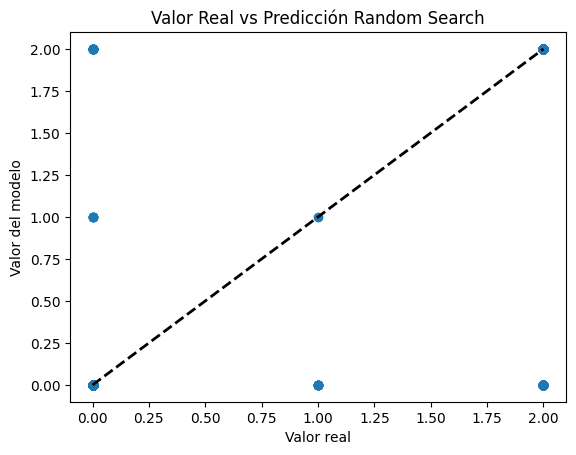

In [ ]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, y_pred_knn)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Random Search')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

###11.2. Red neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

# Espacio de hiperparámetros para Red Neuronal
param_grid_rn = {
    'hidden_layer_sizes': Integer(50, 100),  # Número de neuronas en capa oculta
    'alpha': Real(1e-5, 1e-1, prior='log-uniform'),
    'learning_rate': Categorical(['constant', 'adaptive']),
}

# Búsqueda Bayesiana
bayes_rn = BayesSearchCV(
    estimator=MLPClassifier(max_iter=1000, early_stopping=True),
    search_spaces=param_grid_rn,
    n_iter=n_iter,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit=True
)

bayes_rn.fit(X_train_smote, Y_train_smote)

# Mejor modelo y parámetros
best_rn = bayes_rn.best_estimator_
print("Mejores parámetros Red Neuronal:", bayes_rn.best_params_)

# Evaluación en test
y_pred_rn = best_rn.predict(X_test)
print(classification_report(Y_test, y_pred_rn))

Mejores parámetros Red Neuronal: OrderedDict([('alpha', 0.0005783555388950138), ('hidden_layer_sizes', 96), ('learning_rate', 'adaptive')])
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1831
           1       0.33      0.12      0.18         8
           2       0.99      0.95      0.97      1209

    accuracy                           0.97      3048
   macro avg       0.76      0.69      0.71      3048
weighted avg       0.97      0.97      0.97      3048



<ipython-input-67-6b071c5f1368>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


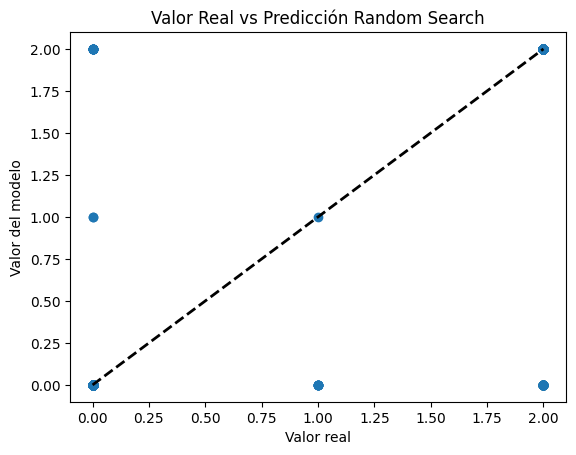

In [ ]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, y_pred_rn)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Random Search')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

###11.3. SVM

In [ ]:
from sklearn.svm import SVC

# Espacio de hiperparámetros para SVM
param_grid_svm = {
    'C': Real(0.01, 1),  # Rango amplio en escala logarítmica
    'kernel': Categorical(['linear', 'rbf', 'poly']),
    'gamma': Real(1e-3, 1e1),
}

# Búsqueda Bayesiana
bayes_svm = BayesSearchCV(
    estimator=SVC(probability=True),
    search_spaces=param_grid_svm,
    n_iter=n_iter,
    cv=cv,
    n_jobs=-1,
    scoring=scoring,
    refit=True
)

# Entrenamiento (usa los datos balanceados con SMOTE)
bayes_svm.fit(X_train_smote, Y_train_smote)

# Mejor modelo y parámetros
best_svm = bayes_svm.best_estimator_
print("Mejores parámetros SVM:", bayes_svm.best_params_)

# Evaluación en test (datos originales)
y_pred_svm = best_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

Mejores parámetros SVM: OrderedDict([('C', 0.620563390436533), ('gamma', 3.8191131320153193), ('kernel', 'poly')])
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1831
           1       0.75      0.38      0.50         8
           2       0.99      0.95      0.97      1209

    accuracy                           0.97      3048
   macro avg       0.90      0.77      0.81      3048
weighted avg       0.97      0.97      0.97      3048



<ipython-input-66-4cca0b2240c1>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


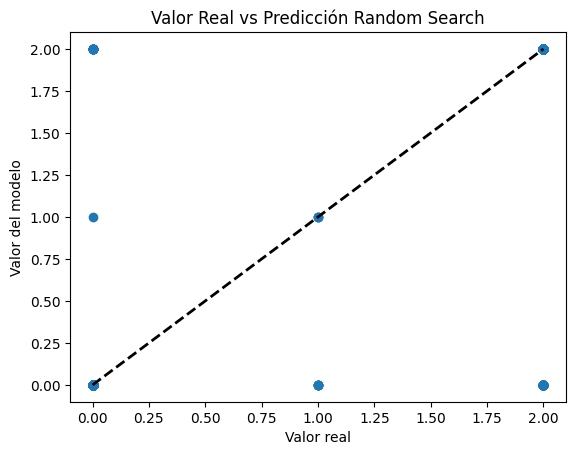

In [ ]:
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, y_pred_svm)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Random Search')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

In [ ]:
#Entrenar el mejor modelo
best_svm.fit(X, Y)

SVC(C=0.620563390436533, gamma=3.8191131320153193, kernel='poly',
    probability=True)

In [ ]:
#Se guarde el mejor modelo para despliegue con pickle
import pickle
filename = 'modeloSVM-clas-dengue.pkl'
variables= X.columns._values
pickle.dump([best_svm,labelencoder,variables], open(filename, 'wb')) #write